In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LassoCV, Lasso

from math import sqrt

import seaborn as sns


np.set_printoptions(suppress=True, precision=4)

%matplotlib inline

In [105]:
df = pd.read_csv("https://raw.githubusercontent.com/souravkantha/machine_learning/master/lr.csv")

df.fillna(0,inplace = True) 
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


There are 50 observations and 5 columns. 4 columns - R&D Spend, Administration and Marketing Spend, and Profile are numeric and one is categorical - State. There is no null values in the dataset. 

Let's see the distribution of the Profit using a histogram plot and see if there is any outliers in the data using bosplot.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


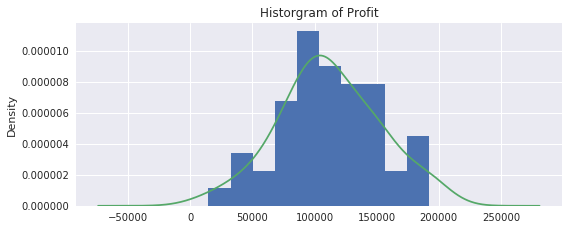

In [96]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1)
df.Profit.plot.hist(bins = 10, normed = True)
df.Profit.plot.kde(title = "Historgram of Profit")

#plt.subplot(2, 1, 2)
#df.Profit.plot.box(vert = False, title = "Boxplot of Profit")

plt.tight_layout()

Profit has one outlier. We can try to take log scale to remove the outlier value before doing any prediction. But for now, let ignore the outlier.

Let's plot association between each pair of columns. 

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


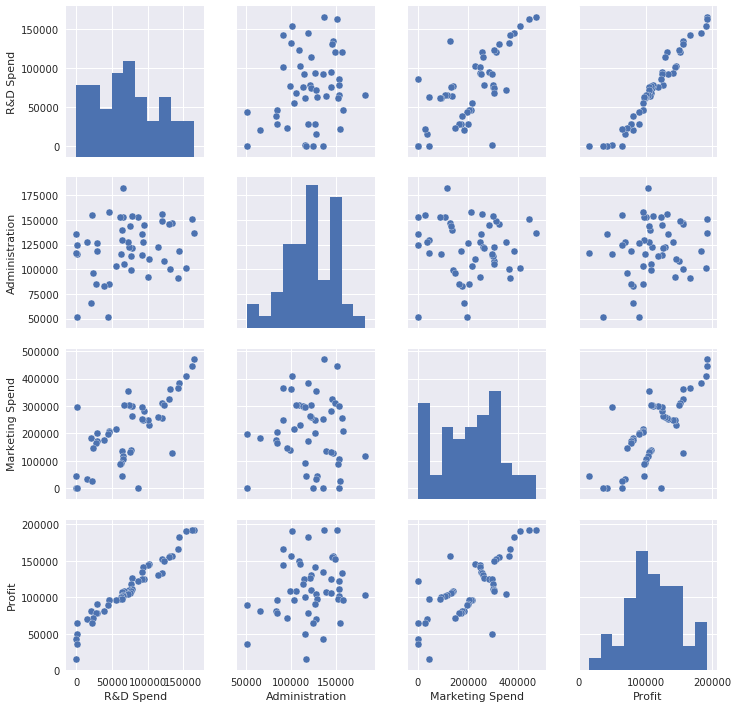

In [97]:
sns.pairplot(df)

Displays only the numeric column. Let's how the avg Profit plays for each State.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


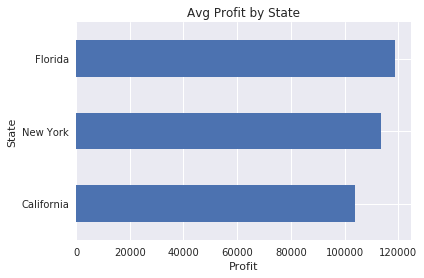

In [52]:
df.groupby("State").Profit.mean().sort_values().plot.barh(title = "Avg Profit by State")
plt.xlabel("Profit")

Avg Profit is highest in state of Florida and least in California.

Let's create the y vector containing the outcome column.

In [53]:
y = df.Profit.values
y

array([ 192261.83,  191792.06,  191050.39,  182901.99,  166187.94,
        156991.12,  156122.51,  155752.6 ,  152211.77,  149759.96,
        146121.95,  144259.4 ,  141585.52,  134307.35,  132602.65,
        129917.04,  126992.93,  125370.37,  124266.9 ,  122776.86,
        118474.03,  111313.02,  110352.25,  108733.99,  108552.04,
        107404.34,  105733.54,  105008.31,  103282.38,  101004.64,
         99937.59,   97483.56,   97427.84,   96778.92,   96712.8 ,
         96479.51,   90708.19,   89949.14,   81229.06,   81005.76,
         78239.91,   77798.83,   71498.49,   69758.98,   65200.33,
         64926.08,   49490.75,   42559.73,   35673.41,   14681.4 ])

Let's create dummy variables for categorical feature.

In [66]:
df_features = df.iloc[:, 0:4]
# could use one hot encoding approach too
df_dummied = pd.get_dummies(df_features, columns=["State"], drop_first=True)
df_dummied.sample(10)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
36,28663.76,127056.21,201126.82,1,0
30,61994.48,115641.28,91131.24,1,0
39,38558.51,82982.09,174999.30,0,0
27,72107.60,127864.55,353183.81,0,1
16,78013.11,121597.55,264346.06,0,0
7,130298.13,145530.06,323876.68,1,0
38,20229.59,65947.93,185265.10,0,1
8,120542.52,148718.95,311613.29,0,1
18,91749.16,114175.79,294919.57,1,0
28,66051.52,182645.56,118148.20,1,0


State column has been replaced by two additional column - one for Florida and one NY. First value in the categorical values CA has been dropped to avoid collinearity issue.

Now, let's create X feature matrix and y outcome vector.  

In [67]:
X = df_dummied.values
X[0, :]

array([ 165349.2,  136897.8,  471784.1,       0. ,       1. ])

Let's normalize the feature values to bring them to a similar scale.

In [68]:
scaler = StandardScaler() 
X_std = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


Split the X and y into training and test sets.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.3, random_state = 100)

In [70]:
print("Training set: ", X_train.shape, y_train.shape)

Training set:  (35, 5) (35,)


In [71]:
print("Test set: ", X_test.shape, y_test.shape)

Test set:  (15, 5) (15,)


Ratio of the size of the training data

In [72]:
X_train.shape[0] / df.shape[0]

0.7

Fit linear regression model

In [99]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
lr.intercept_, lr.coef_

(111442.18784400707,
 array([ 38209.9736,   -775.0259,   2756.1079,  -1532.2616,  -2506.5352]))

By looking at the cofficients, we can conclude that R&D Spend has the higest influence on the outcome variable.

Predict the outcome based on the model

In [101]:
y_test_pred = lr.predict(X_test)

In [102]:
output = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
output["error"] = output.actual - output.prediction
output

,actual,prediction,error
0,156122.51,162877.200905,-6754.690905
1,90708.19,72734.781061,17973.408939
2,89949.14,90998.192353,-1049.052353
3,103282.38,100730.655548,2551.724452
4,69758.98,55884.994373,13873.985627
5,14681.40,48647.970829,-33966.570829
6,156991.12,161960.522158,-4969.402158
7,96778.92,96273.641001,505.278999
8,118474.03,118625.800514,-151.770514
9,71498.49,71449.009873,49.480127


A simpliest prediction model could have been the average. Let's how the model did overall against one feature.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


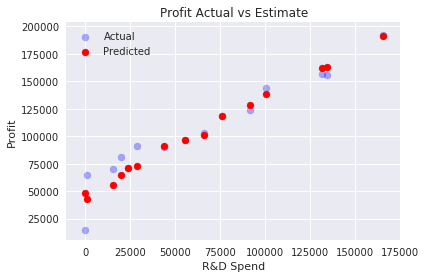

In [103]:
X_test_inv = scaler.inverse_transform(X_test)
plt.scatter(X_test_inv[:, 0], y_test, alpha = 0.3, c = "blue", label = "Actual")
plt.scatter(X_test_inv[:, 0], y_test_pred, c = "red", label = "Predicted")

plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Profit Actual vs Estimate")
plt.legend()

In [78]:
np.mean((y_test_pred - y_test) ** 2)

169303616.12869918

In [79]:
y_train_pred = lr.predict(X_train)

In [90]:
output_pred = pd.DataFrame({"actual profit": y_test, "predicted profit": y_test_pred})
output_pred

,actual,prediction
0,156122.51,162877.200905
1,90708.19,72734.781061
2,89949.14,90998.192353
3,103282.38,100730.655548
4,69758.98,55884.994373
5,14681.40,48647.970829
6,156991.12,161960.522158
7,96778.92,96273.641001
8,118474.03,118625.800514
9,71498.49,71449.009873


Compare the root mean squared error (RMSE) of test dataset against the training.

In [41]:
sqrt(mean_squared_error(y_test, y_test_pred)), sqrt(mean_squared_error(y_train, y_train_pred))

(13011.672303309026, 6945.630255385447)

r2 score can have a max value 1, negative values of R2 means suboptimal model 

   

In [42]:
r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)

(0.91000648598133016, 0.96645583180478356)

On the training the both RMSE and R2 scores perform natually better than those on the test dataset.

# End of this file